In [54]:
# average figures measured on June 1st(Sat), 4th(Tue), 16th(Sun) and 20th(Thu)
# import four xlsx files
import pandas as pd
df04 = pd.read_excel('영업소간교통량240604.xlsx')
df12 = pd.read_excel('영업소간교통량240612.xlsx')
df20 = pd.read_excel('영업소간교통량240620.xlsx')
df24 = pd.read_excel('영업소간교통량240624.xlsx')

KeyboardInterrupt: 

In [ ]:
# extract columns of interest
# pdf stands for Partial dataFrame
pdf04 = df04[['출발영업소코드','도착영업소코드','출발영업소명','도착영업소명','도착지방향총교통량','출발지방향총교통량']]
pdf12 = df12[['출발영업소코드','도착영업소코드','출발영업소명','도착영업소명','도착지방향총교통량','출발지방향총교통량']]
pdf20 = df20[['출발영업소코드','도착영업소코드','출발영업소명','도착영업소명','도착지방향총교통량','출발지방향총교통량']]
pdf24 = df24[['출발영업소코드','도착영업소코드','출발영업소명','도착영업소명','도착지방향총교통량','출발지방향총교통량']]

In [ ]:
# sort pdfs by columns '출발영업소코드' and'도착영업소코드'
pdf04 = pdf04.sort_values(by=['출발영업소코드','도착영업소코드'], ascending=[True,True], ignore_index=True)
pdf12 = pdf12.sort_values(by=['출발영업소코드','도착영업소코드'], ascending=[True,True], ignore_index=True)
pdf20 = pdf20.sort_values(by=['출발영업소코드','도착영업소코드'], ascending=[True,True], ignore_index=True)
pdf24 = pdf24.sort_values(by=['출발영업소코드','도착영업소코드'], ascending=[True,True], ignore_index=True)

In [ ]:
pdf04 # rudundant rows are found at its tail

In [ ]:
# truncate rows with invalide station codes by boolean indexing
# 987 is the maximum code according to the list obtained in the first step(fetchOpentAPI_1)
# tdf stands for truncated dataFrame
codeLimit = 987
bMask = (pdf04['출발영업소코드']>codeLimit) | (pdf04['도착영업소코드']>codeLimit)
tdf04 = pdf04[~bMask]
print("tdf04 :\n", tdf04)

# do the same to the rest
# as all are thought to have the same rows, use the bMask01 to the rest as well
tdf12 = pdf12[~bMask]
tdf20 = pdf20[~bMask]
tdf24 = pdf24[~bMask]

# check their tails
print("tdf12 :\n", tdf12.tail())
print("tdf20 :\n", tdf20.tail())
print("tdf24 :\n", tdf24.tail())

In [ ]:
# make copies of tdfs and rename traffic columns
mdf04 = tdf04.copy()
mdf04 = mdf04.rename(columns={'도착지방향총교통량':'도착지방향총교통량04','출발지방향총교통량':'출발지방향총교통량04'})

mdf12 = tdf12.copy()
mdf12 = mdf12.rename(columns={'도착지방향총교통량':'도착지방향총교통량12','출발지방향총교통량':'출발지방향총교통량12'})

mdf20 = tdf20.copy()
mdf20 = mdf20.rename(columns={'도착지방향총교통량':'도착지방향총교통량20','출발지방향총교통량':'출발지방향총교통량20'})

mdf24 = tdf24.copy()
mdf24 = mdf24.rename(columns={'도착지방향총교통량':'도착지방향총교통량24','출발지방향총교통량':'출발지방향총교통량24'})

In [ ]:
# merge mdfs one by one
mdf = pd.merge(mdf04, mdf12, how='outer')
mdf = pd.merge(mdf, mdf20, how='outer')
mdf = pd.merge(mdf, mdf24, how='outer')
mdf

In [ ]:
# add average columns
mdf['도착지방향평균'] = (mdf['도착지방향총교통량04'] + mdf['도착지방향총교통량12'] + mdf['도착지방향총교통량20'] + mdf['도착지방향총교통량24'])/4
mdf['출발지방향평균'] = (mdf['출발지방향총교통량04'] + mdf['출발지방향총교통량12'] + mdf['출발지방향총교통량20'] + mdf['출발지방향총교통량24'])/4
mdf

In [ ]:
# finally get the desired dataFrame
# fdf stands for final dataFrame
fdf = mdf[['출발영업소코드','도착영업소코드','출발영업소명','도착영업소명','도착지방향평균','출발지방향평균']]
fdf

In [42]:
# save fdf for later use
fdf.to_csv('WeekdayAverageTraffic.csv', index=False) 

In [ ]:
# as in p4, single out rows related with Gyeongnam
fdf = fdf.drop(columns=['출발영업소코드','도착영업소코드'])
fdf.head()

In [ ]:
sdf = pd.read_csv('sdf.csv')
sdf.head()

In [ ]:
mdf = pd.merge(fdf, sdf, left_on="출발영업소명", right_on="새영업소명").drop('새영업소명', axis=1)
mdf = pd.merge(mdf, sdf, left_on="도착영업소명", right_on="새영업소명").drop('새영업소명', axis=1)
mdf.head()

In [ ]:
# drop redundant columns
mdf = mdf.drop(columns=['노선명_x','노선명_y'])
mdf.head()

In [ ]:
# rename the added columns
mdf = mdf.rename(columns={'세부주소1_x':'출발주소1', '세부주소2_x':'출발주소2',
                         '세부주소1_y':'도착주소1', '세부주소2_y':'도착주소2'})
mdf.head()

In [ ]:
# change the order of columns
mdf = mdf.iloc[:,[0,4,5,1,6,7,3,2]]
mdf.head()

In [ ]:
# drop rows having nothing to do with 경상남도 by using 도착주소1 which refers to province
# namely, leave no rows whose start- and terminal stations are both outside 경상남도
dropCond = mdf[(mdf['출발주소1']!='경상남도') & (mdf['도착주소1']!='경상남도')].index
mdf = mdf.drop(dropCond)
mdf.head()

In [ ]:
pmdf = mdf[['출발주소2','도착주소2','출발지방향평균','도착지방향평균']]
pmdf

In [52]:
pmdf.to_csv('경남평일교통량평균.csv', index=False, encoding='utf-8') 

In [83]:
import pandas as pd
pmdf = pd.read_csv('경남평일교통량평균.csv')
pmdf.head()

,출발주소2,도착주소2,도착지방향평균
0,경기도,함양군,14.25
1,경기도,양산시,1.25
2,경기도,함안군,1.00
3,경기도,함안군,0.50
4,경기도,함안군,6.00


In [84]:
pmdf.sort_values(by='도착지방향평균', ascending=False)

,출발주소2,도착주소2,도착지방향평균
16661,김해시,김해시,15580.00
17089,김해시,김해시,15438.75
36983,김해시,김해시,14856.00
6151,김해시,부산광역시,11873.75
6541,부산광역시,김해시,10403.00
...,...,...,...
21562,사천시,충청북도,0.00
21560,사천시,충청북도,0.00
21559,사천시,충청북도,0.00
21558,사천시,충청북도,0.00


In [85]:
# to an adjacency matrix
nList = mdf['출발주소2'].unique()
print(len(nList))
print(nList)

29
['경기도' '함양군' '충청남도' '충청북도' '대전광역시' '경상북도' '대구광역시' '울산광역시' '양산시' '부산광역시'
 '함안군' '창원시' '김해시' '전라북도' '전라남도' '강원도' '산청군' '진주시' '창녕군' '합천군' '광주광역시'
 '거창군' '하동군' '사천시' '고성군' '통영시' '세종특별자치시' '밀양시' '예정']


In [86]:
import numpy as np
# create an empty matrix to fill up
adjMatrix = pd.DataFrame(np.zeros((len(nList),len(nList))), columns=nList, index=nList)
adjMatrix.head()

,경기도,함양군,충청남도,충청북도,대전광역시,경상북도,대구광역시,울산광역시,양산시,부산광역시,...,합천군,광주광역시,거창군,하동군,사천시,고성군,통영시,세종특별자치시,밀양시,예정
경기도,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
함양군,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
충청남도,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
충청북도,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
대전광역시,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [87]:
# while iterating over the rows, fill up the elements
for index, row in mdf.iterrows():
    adjMatrix[row['출발주소2']][row['도착주소2']] += row['출발지방향평균']
adjMatrix.head()

C:\Users\syj43\AppData\Local\Temp\ipykernel_22824\1626033714.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  adjMatrix[row['출발주소2']][row['도착주소2']] += row['출발지방향평균']


,경기도,함양군,충청남도,충청북도,대전광역시,경상북도,대구광역시,울산광역시,양산시,부산광역시,...,합천군,광주광역시,거창군,하동군,사천시,고성군,통영시,세종특별자치시,밀양시,예정
경기도,0.0,323.50,0.0,0.0,0.0,0.0,0.0,0.0,25.25,0.00,...,11.25,0.0,80.75,49.50,353.00,112.25,594.75,0.00,405.75,0.0
함양군,343.5,700.75,146.5,77.5,168.5,152.0,219.5,24.0,13.75,54.75,...,12.50,128.5,282.25,23.75,91.25,28.75,52.00,22.25,3.50,0.0
충청남도,0.0,162.25,0.0,0.0,0.0,0.0,0.0,0.0,38.25,0.00,...,4.50,0.0,32.50,122.75,151.75,55.75,183.00,0.00,247.75,0.0
충청북도,0.0,82.75,0.0,0.0,0.0,0.0,0.0,0.0,15.00,0.00,...,6.75,0.0,32.75,65.75,92.75,25.75,120.00,0.00,226.75,0.0
대전광역시,0.0,192.00,0.0,0.0,0.0,0.0,0.0,0.0,17.00,0.00,...,3.00,0.0,25.75,37.50,186.00,43.50,205.75,0.00,193.25,0.0


In [88]:
adjMatrix = adjMatrix.drop(['예정'], axis=0)
adjMatrix = adjMatrix.drop(['예정'], axis=1)

In [89]:
selfLoop = []
for i in range(len(adjMatrix.values)):
    selfLoop.append(adjMatrix.iloc[i][i])
    adjMatrix.iloc[i][i] = 0

C:\Users\syj43\AppData\Local\Temp\ipykernel_22824\590675002.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  selfLoop.append(adjMatrix.iloc[i][i])
C:\Users\syj43\AppData\Local\Temp\ipykernel_22824\590675002.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment i

In [93]:
selfLoop

[np.float64(0.0),
 np.float64(700.75),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(2081.75),
 np.float64(0.0),
 np.float64(23858.75),
 np.float64(6346.0),
 np.float64(81341.75),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(276.5),
 np.float64(2416.75),
 np.float64(425.5),
 np.float64(0.5),
 np.float64(0.0),
 np.float64(597.5),
 np.float64(358.0),
 np.float64(1241.25),
 np.float64(1728.5),
 np.float64(4.0),
 np.float64(0.0),
 np.float64(9157.75)]

In [94]:
totalTraff = adjMatrix.sum(axis='columns')
totalTraff

경기도          7865.75
함양군          3675.50
충청남도         3357.25
충청북도         2874.25
대전광역시        2571.50
경상북도        18114.00
대구광역시       20918.75
울산광역시       20664.25
양산시         61612.00
부산광역시       83758.00
함안군         29340.50
창원시         33263.75
김해시        137908.50
전라북도         4300.25
전라남도         8691.50
강원도           322.00
산청군          3863.75
진주시         30676.50
창녕군          7626.50
합천군          2218.50
광주광역시        1723.75
거창군          5276.50
하동군          7440.50
사천시         16663.75
고성군          9766.25
통영시         13309.25
세종특별자치시       383.50
밀양시         20173.50
dtype: float64

In [37]:
# save the adjMatrix in csv format for later use
adjMatrix.to_csv('gWeekdayHighwayAdjMatrix.csv', index=True, encoding='utf-8') 

In [95]:
# to network
# split it into 경상남도 and the others
# prepare lists of their names
gyeongnam = ['거창군', '고성군', '사천시', '김해시', '함안군', '밀양시', '양산시', '창녕군', '산청군',
       '창원시', '진주시', '통영시', '함양군', '하동군', '합천군']
others = ['부산광역시', '경상북도', '충청북도', '강원도', '전라남도', '경기도', '충청남도', '전라북도',
       '광주광역시', '대구광역시', '대전광역시', '세종특별자치시', '울산광역시']
# and split the totalTraff series into two
gyeongnamTraff = totalTraff[gyeongnam]
othersTraff = totalTraff[others]
gyeongnamTraff

거창군      5276.50
고성군      9766.25
사천시     16663.75
김해시    137908.50
함안군     29340.50
밀양시     20173.50
양산시     61612.00
창녕군      7626.50
산청군      3863.75
창원시     33263.75
진주시     30676.50
통영시     13309.25
함양군      3675.50
하동군      7440.50
합천군      2218.50
dtype: float64

In [77]:
gyeongnamTraff.to_csv('gWeekdayTotalTraffic.csv')

In [96]:
list(gyeongnamTraff.index)

['거창군',
 '고성군',
 '사천시',
 '김해시',
 '함안군',
 '밀양시',
 '양산시',
 '창녕군',
 '산청군',
 '창원시',
 '진주시',
 '통영시',
 '함양군',
 '하동군',
 '합천군']

In [97]:
gyeongnamTraff.values

array([  5276.5 ,   9766.25,  16663.75, 137908.5 ,  29340.5 ,  20173.5 ,
        61612.  ,   7626.5 ,   3863.75,  33263.75,  30676.5 ,  13309.25,
         3675.5 ,   7440.5 ,   2218.5 ])

In [98]:
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import numpy as np

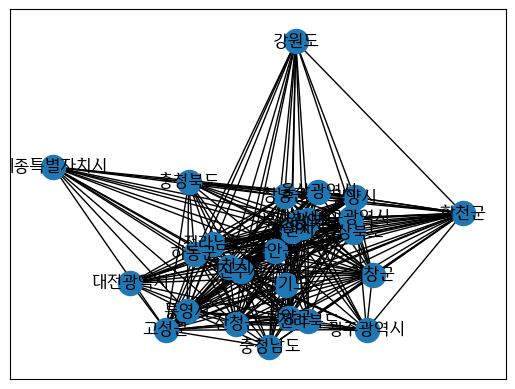

In [104]:
mpl.rcParams["font.family"] = 'Binggrae?'
H = nx.from_pandas_adjacency(adjMatrix)
nx.draw_networkx(H, font_family='Binggrae?')

In [ ]:
# plz add centrality measure


In [99]:
import matplotlib.font_manager as fm
# fm.fontManager.addfont('BinggraeII-Bold.ttf')
fm.fontManager.addfont('BinggraeII.ttf')

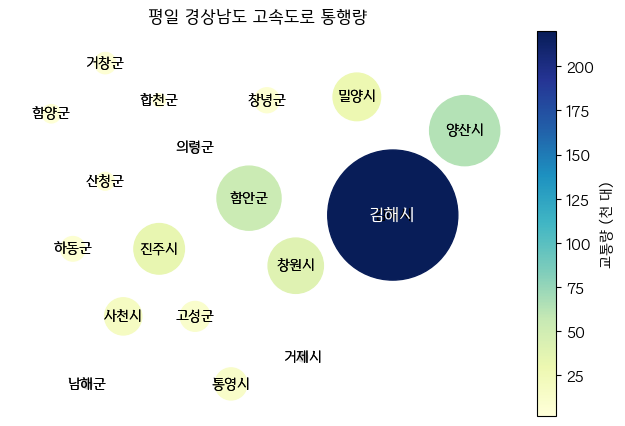

In [81]:
# color nodes according to their total traffic with matplotlib cmap
import matplotlib as mpl

fig, ax = plt.subplots(1,1,figsize=(8,5))
mpl.rcParams["font.family"] = 'Binggrae?'
cmap = plt.cm.YlGnBu
G = nx.Graph()
G.add_nodes_from(list(gyeongnamTraff.index))
missingNode = ['의령군','남해군','거제시']
G.add_nodes_from(missingNode)
pos = {'합천군':(300,520),'함양군':(150,500),'산청군':(225,400),'거창군':(225,575),'창녕군':(450,520),'하동군':(180,300)
      ,'고성군':(350,200),'통영시':(400,100),'사천시':(250,200),'진주시':(300,300),'밀양시':(575,525),'창원시':(490,275)
      ,'함안군':(425,375),'양산시':(725,475),'김해시':(625,350)}
pos.update({'의령군':(350,450),'남해군':(200,100),'거제시':(500,140)})
nx.draw_networkx(G, with_labels=True, ax=ax, pos=pos, nodelist=list(gyeongnamTraff.index), font_size=10, node_size=gyeongnamTraff.values/25, node_color=gyeongnamTraff.values/1000, cmap=cmap, font_family='Binggrae?')
nx.draw_networkx(G, with_labels=True, ax=ax, pos=pos, nodelist=missingNode, font_size=10, node_size=np.ones(3)*50, node_color='lightgray', font_family='Binggrae?')
# add color bar
norm = mpl.colors.Normalize(vmin=2, vmax=220)
fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
             ax=ax, orientation='vertical', label='교통량 (천 대)')
# Title/legend
font = {"fontname": "Binggrae?", "color": "white", "fontsize": 12, "fontweight": "extra bold"}
ax.text(
    0.77,
    0.51,
    "김해시",
    horizontalalignment="center",
    transform=ax.transAxes,
    fontdict=font,
)
# remove the frame from the fig
plt.tick_params(axis='x', which='both', bottom=False, 
                top=False, labelbottom=False) 
plt.tick_params(axis='y', which='both', right=False, 
                left=False, labelleft=False) 
for pos in ['right', 'top', 'bottom', 'left']: 
    plt.gca().spines[pos].set_visible(False) 
plt.title('평일 경상남도 고속도로 통행량')
plt.margins(0.1,0.1)
plt.show()

In [82]:
fig.savefig('평일경남고속도로통행량.png')